In [43]:
import numpy as np
import tensorflow as tf 
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

In [44]:
from tensorflow.keras.models import Sequential

In [45]:
from tensorflow.keras.layers import Dense 

In [46]:
from tensorflow.keras.applications.vgg16 import VGG16

In [47]:
from PIL import Image
import matplotlib.pyplot as plt

In [48]:
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions

In [49]:
train_files_path="C:/Users/HUAWEI/Desktop/ml/Train/"
test_files_path="C:/Users/HUAWEI/Desktop/ml/Test/"

In [50]:
img=load_img(test_files_path+"E-3/9-1.jpg")

In [51]:
img_to_array(img).shape

(194, 239, 3)

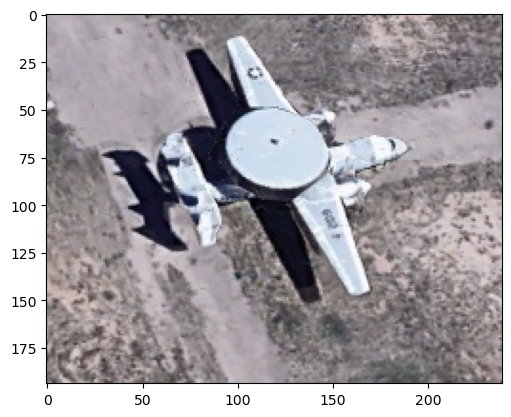

In [52]:
plt.imshow(img)
plt.show()

In [53]:
train_data=ImageDataGenerator().flow_from_directory(train_files_path,target_size=(224,224))
test_data=ImageDataGenerator().flow_from_directory(test_files_path,target_size=(224,224))

Found 698 images belonging to 3 classes.
Found 709 images belonging to 3 classes.


In [54]:
numberofplanettype=3

In [55]:
vgg=VGG16()

In [56]:
vgg_layers=vgg.layers

In [57]:
vgg_layers

[<InputLayer name=input_layer_1, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=fc1, built=True>,
 <Dense name=fc2, built=True>,
 <Dense name=predictions, built=True>]

In [58]:
useoflayers=len(vgg_layers)-1

In [59]:
model=Sequential()

In [60]:
for i in range(useoflayers):
    model.add(vgg_layers[i])

In [61]:
for layers in model.layers:
    layers.trainable=False

In [62]:
model.add(Dense(numberofplanettype,activation="softmax"))

In [63]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,272,835 (512.21 MB)

 Trainable params: 12,291 (48.01 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

In [64]:
model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [65]:
batch_size=4

model.fit(train_data,
                    steps_per_epoch=400//batch_size,
                    epochs=4,
                    validation_data=test_data,
                    validation_steps=200//batch_size)

Epoch 1/4
 22/100 ━━━━━━━━━━━━━━━━━━━━ 5:04 4s/step - accuracy: 0.5890 - loss: 1.6988

C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.6939 - loss: 1.1364 - val_accuracy: 0.4739 - val_loss: 1.4171
Epoch 2/4
100/100 ━━━━━━━━━━━━━━━━━━━━ 239s 2s/step - accuracy: 0.9071 - loss: 0.2659 - val_accuracy: 0.6502 - val_loss: 1.0866
Epoch 3/4
100/100 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.9605 - loss: 0.1291 - val_accuracy: 0.6333 - val_loss: 1.1970
Epoch 4/4
100/100 ━━━━━━━━━━━━━━━━━━━━ 249s 2s/step - accuracy: 0.9780 - loss: 0.0766 - val_accuracy: 0.6657 - val_loss: 1.1960


In [66]:
img=Image.open("0-307.jpg").resize((224,224))

In [67]:
img=np.array(img)

In [68]:
img.shape

(224, 224, 3)

In [69]:
img.ndim

3

In [70]:
img=img.reshape(-1,224,224,3)

In [71]:
img.shape

(1, 224, 224, 3)

In [72]:
img=preprocess_input(img)

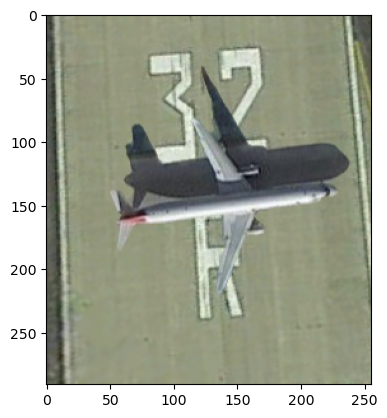

In [74]:
img_show=load_img("0-307.jpg")
plt.imshow(img_show)
plt.show()

In [75]:
preds=model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step


In [76]:
preds

array([[0.16851328, 0.81398183, 0.01750483]], dtype=float32)

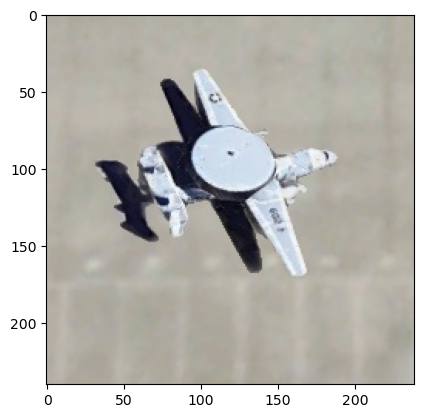

In [77]:
img_show=load_img("9-229.jpg")
plt.imshow(img_show)
plt.show()

In [78]:
preds=model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


In [79]:
preds

array([[0.16851328, 0.81398183, 0.01750483]], dtype=float32)